In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
eurusd = pd.read_csv("data/EURUSD_daily.csv", index_col='Date')

In [144]:
eurusd.index = pd.to_datetime(eurusd.index)

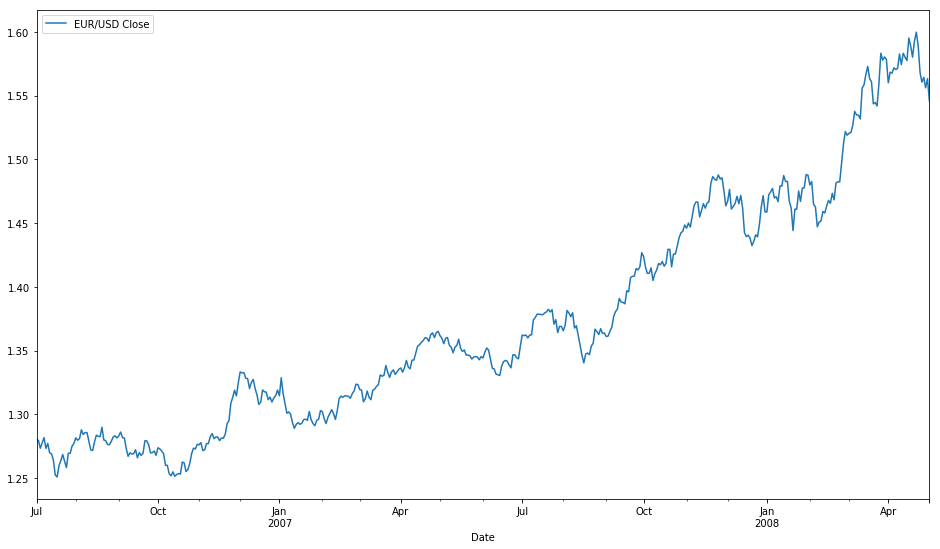

In [151]:
eurusd['2006-07-01':'2008-05-01'].plot(figsize=(16,9))

In [152]:
eurusd = eurusd['2006-07-01':'2008-05-01']

In [153]:
split_date = pd.Timestamp('03-01-2008')

In [154]:
train = eurusd.loc[:split_date]
test = eurusd.loc[split_date:]

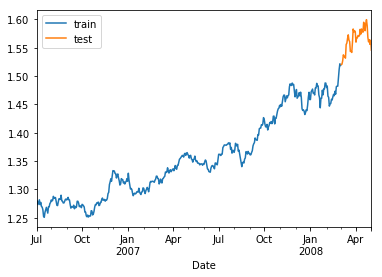

In [155]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [156]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [157]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Fully conected simple net

In [158]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [159]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [160]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [161]:
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

Epoch 1/200
434/434 [==============================] - 0s - loss: 0.2103     
Epoch 2/200
434/434 [==============================] - 0s - loss: 0.0464     
Epoch 3/200
434/434 [==============================] - 0s - loss: 0.0299     
Epoch 4/200
434/434 [==============================] - 0s - loss: 0.0238     
Epoch 5/200
434/434 [==============================] - 0s - loss: 0.0179     
Epoch 6/200
434/434 [==============================] - 0s - loss: 0.0124     
Epoch 7/200
434/434 [==============================] - 0s - loss: 0.0078     
Epoch 8/200
434/434 [==============================] - 0s - loss: 0.0044     
Epoch 9/200
434/434 [==============================] - 0s - loss: 0.0023     
Epoch 10/200
434/434 [==============================] - 0s - loss: 0.0012     
Epoch 11/200
434/434 [==============================] - 0s - loss: 6.8361e-04     
Epoch 12/200
434/434 [==============================] - 0s - loss: 5.2387e-04     
Epoch 13/200
434/434 [==============================]

In [162]:
y_pred = model.predict(X_test)

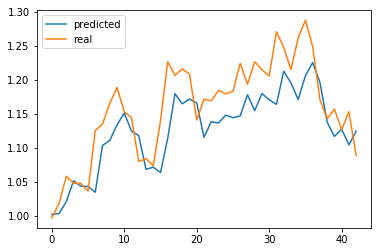

In [163]:
ax = plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

### Recurent net using LSTM

In [164]:
from keras.layers import LSTM

In [165]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [166]:
K.clear_session()

model = Sequential()

model.add(LSTM(6, input_shape=(1,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [167]:
model.fit(X_train_t, y_train,
          epochs=100, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
434/434 [==============================] - 0s - loss: 0.1151     
Epoch 2/100
434/434 [==============================] - 0s - loss: 0.0435     
Epoch 3/100
434/434 [==============================] - 0s - loss: 0.0238     
Epoch 4/100
434/434 [==============================] - 0s - loss: 0.0061     
Epoch 5/100
434/434 [==============================] - 0s - loss: 7.4310e-04     
Epoch 6/100
434/434 [==============================] - 0s - loss: 5.3508e-04     
Epoch 7/100
434/434 [==============================] - 0s - loss: 5.2542e-04     
Epoch 8/100
434/434 [==============================] - 0s - loss: 5.1662e-04     
Epoch 9/100
434/434 [==============================] - 0s - loss: 5.1939e-04     
Epoch 10/100
434/434 [==============================] - 0s - loss: 5.0594e-04     
Epoch 11/100
434/434 [==============================] - 0s - loss: 4.9439e-04     
Epoch 12/100
434/434 [==============================] - 0s - loss: 4.9885e-04     
Epoch 13/100
434/434 [=======

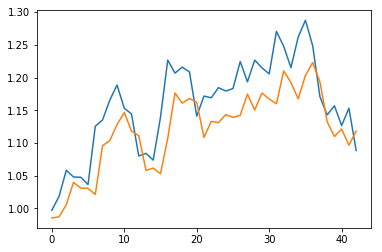

In [168]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

### With window

In [169]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index = test.index)
train_sc_df.head()

,Scaled
Date,
2006-07-03,0.109635
2006-07-04,0.105574
2006-07-05,0.083056
2006-07-06,0.098929
2006-07-07,0.114064


In [170]:
for s in range(1,21):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [171]:
train_sc_df.head(21)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
Date,,,,,,,,,,,,,,,,,,,,,
2006-07-03,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-04,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-05,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-06,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-07,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-10,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-11,0.097084,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-12,0.069767,0.097084,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-13,0.066814,0.069767,0.097084,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [173]:
#converts to numpy array
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

### Fully contected on windows

In [174]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.fit(X_train, y_train, epochs=200,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/200
415/415 [==============================] - 0s - loss: 0.0486     
Epoch 2/200
415/415 [==============================] - 0s - loss: 0.0055     
Epoch 3/200
415/415 [==============================] - 0s - loss: 0.0050     
Epoch 4/200
415/415 [==============================] - 0s - loss: 0.0046      
Epoch 5/200
415/415 [==============================] - 0s - loss: 0.0037      
Epoch 6/200
415/415 [==============================] - 0s - loss: 0.0037     
Epoch 7/200
415/415 [==============================] - 0s - loss: 0.0033     
Epoch 8/200
415/415 [==============================] - 0s - loss: 0.0032     
Epoch 9/200
415/415 [==============================] - 0s - loss: 0.0028     
Epoch 10/200
415/415 [==============================] - 0s - loss: 0.0027     
Epoch 11/200
415/415 [==============================] - 0s - loss: 0.0023     
Epoch 12/200
415/415 [==============================] - 0s - loss: 0.0021      
Epoch 13/200
415/415 [==============================] - 0s

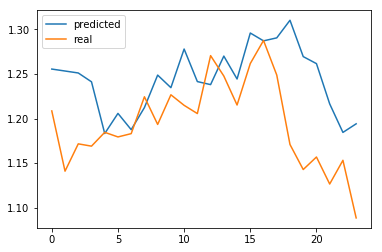

In [178]:
y_pred = model.predict(X_test)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

### LSTM on Windows - simultanous passing of window with size 20

In [205]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 20)
X_test_t = X_test.reshape(X_test.shape[0], 1, 20)

In [214]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 20)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [215]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 648       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
415/415 [==============================] - 0s - loss: 0.0012     
Epoch 2/100
415/415 [==============================] - 0s - loss: 0.0012     
Epoch 3/100
415/415 [==============================] - 0s - loss: 0.0011     
Epoch 4/100
415/415 [==============================] - 0s - loss: 0.0010     
Epoch 5/100
415/415 [==============================] - 0s - loss: 0.0011     
Epoch 6/100
415/415 [==============================] - 0s - loss: 9.9607e-04     
Epoch 7/100
415/415 [==============================] - 0s - loss: 9.7089e-04     
Epoch 8/100
415/415 [==============================] - 0s - loss: 9.3680e-04     
Epoch 9/100
415/415 [==============================] - 0s - loss: 9.1395e-04     
Epoch 10/100
415/415 [==============================] - 0s - loss: 9.1783e-04     
Epoch 11/100
415/415 [==============================] - 0s - loss: 7.9566e-04     
Epoch 12/100
415/415 [==============================] - 0s - loss: 9.2874e-04     
Epoch 13/100
415/415 [===========

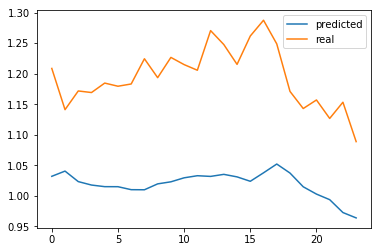

In [219]:
y_pred = model.predict(X_test_t)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

### LSTM on windows - passing sequential to net

In [220]:
X_train_t = X_train.reshape(X_train.shape[0],20,1)
X_test_t = X_test.reshape(X_test.shape[0],20,1)

In [224]:
K.clear_session()
model = Sequential()

model.add(LSTM(8, input_shape=(20, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [225]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [226]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1,callbacks=[early_stop])

Epoch 1/100
415/415 [==============================] - 2s - loss: 0.0387     
Epoch 2/100
415/415 [==============================] - 2s - loss: 0.0038     
Epoch 3/100
415/415 [==============================] - 2s - loss: 0.0036     
Epoch 4/100
415/415 [==============================] - 2s - loss: 0.0038     
Epoch 5/100
415/415 [==============================] - 2s - loss: 0.0035     
Epoch 6/100
415/415 [==============================] - 2s - loss: 0.0036     
Epoch 7/100
415/415 [==============================] - 2s - loss: 0.0035     
Epoch 8/100
415/415 [==============================] - 2s - loss: 0.0034     
Epoch 9/100
415/415 [==============================] - 2s - loss: 0.0033     
Epoch 10/100
415/415 [==============================] - 2s - loss: 0.0033     
Epoch 11/100
415/415 [==============================] - 2s - loss: 0.0033     
Epoch 12/100
415/415 [==============================] - 2s - loss: 0.0035     
Epoch 13/100
415/415 [==============================] - 2s - 

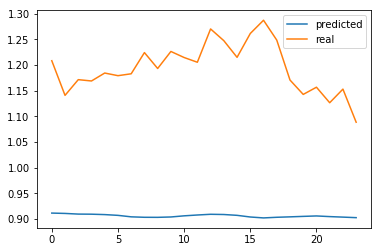

In [202]:
y_pred = model.predict(X_test_t)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])